In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn as nn 
import matplotlib.pyplot as plt
import random
import torch

In [2]:
import struct
from array import array
from os.path import join

In [3]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

In [4]:
# Set file paths based on added MNIST Datasets
#
input_path = 'C:/Users/Bibidh Subedi/Desktop/lolol/minst_digit/archive/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


In [5]:
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


In [6]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


In [ ]:
import torch.nn.functional as F
x_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
x_resized = F.interpolate(x_tensor, size=(14, 14), mode='bilinear', align_corners=False)
x_train = x_resized.squeeze(1).numpy()  # [N, 14, 14]




ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [196] and output size of (14, 14). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

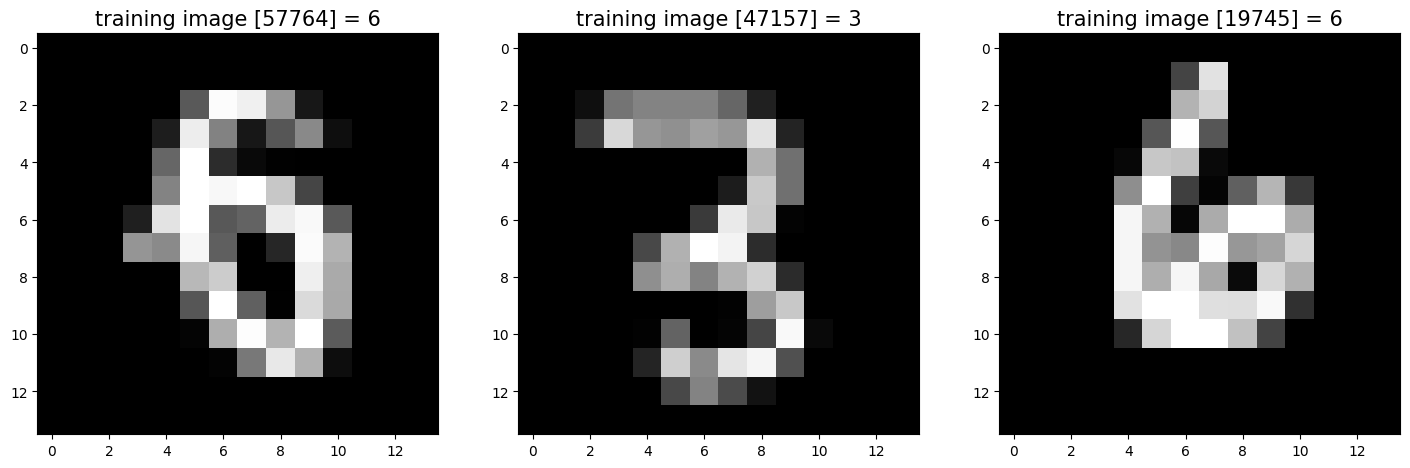

In [8]:
images_2_show = []
titles_2_show = []
for i in range(0, 3):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    
show_images(images_2_show, titles_2_show)

n = 10000
x_train = x_train[:n]
y_train = y_train[:n]

### ----------------------------------------------------------------------------------------------------------------

In [9]:
print(len(x_train),len(y_train),len(x_test),len(y_test),type(x_train[0]),type(x_train[0][0]),type(y_train[0]))
print(len(x_train[0]))
x_train = x_train.astype(np.float32) / 255.0

10000 10000 10000 10000 <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'int'>
14


In [10]:
# Convert all the images to their tensor forms

In [11]:
from torch.nn import CrossEntropyLoss
from torch.nn import MSELoss
import torch.optim as optim
from torch.utils.data import TensorDataset

In [12]:
# 28x28 is the size of the image so, let the input layer be of size 784?

In [13]:
# # print(x_train[0])
# flattened = []

# all = []
# for t in x_train:
#     x = 0
#     for r in t:
#         for c in r:
#             flattened.append(c)
    
#     all.append(flattened)
    

# print(all[0])

# Flatten each sample
x_train = np.array(x_train)
all = x_train.reshape(x_train.shape[0], -1)

print(len(all[1]))

x_train = all


196


In [14]:
dataset = TensorDataset(torch.tensor(x_train, dtype=torch.float),torch.tensor(y_train, dtype=torch.float))

In [15]:
from torch.utils.data import DataLoader
batch_size = 4
suffel = True

dl = DataLoader(dataset,batch_size, suffel)

In [16]:
model = nn.Sequential(nn.Linear(196,128),nn.ReLU(),nn.Linear(128,64),nn.ReLU(),nn.Linear(64,10))
optimizer = optim.Adam(model.parameters(), lr=0.01)
losser = CrossEntropyLoss()


In [17]:

for ep in range(100):
    print("Epoch : ",ep)
    training_loss = 0.0

    x = 0
    for data in dl:
        x+=1
        optimizer.zero_grad()
        feat, tar = data
        pred = model(feat)
        loss = losser(pred, tar.long())
        loss.backward()
        optimizer.step()

        training_loss += loss.item()
    print(x)
    
    epoch_loss = training_loss/len(dl)
    print("Epoch loss : ",epoch_loss)

Epoch :  0
2500
Epoch loss :  0.5072375358959298
Epoch :  1
2500
Epoch loss :  0.30659908212156484
Epoch :  2
2500
Epoch loss :  0.2861004815502564
Epoch :  3
2500
Epoch loss :  0.24560073505923483
Epoch :  4
2500
Epoch loss :  0.22528928128878506
Epoch :  5
2500
Epoch loss :  0.22133300069083517
Epoch :  6
2500
Epoch loss :  0.23700273477680872
Epoch :  7
2500
Epoch loss :  0.2151166035821755
Epoch :  8
2500
Epoch loss :  0.20402717264616077
Epoch :  9
2500
Epoch loss :  0.19087977420607077
Epoch :  10
2500
Epoch loss :  0.18140486335610456
Epoch :  11
2500
Epoch loss :  0.20948512079010342
Epoch :  12
2500
Epoch loss :  0.16586549932751402
Epoch :  13
2500
Epoch loss :  0.18643363616474812
Epoch :  14
2500
Epoch loss :  0.16355896717655996
Epoch :  15
2500
Epoch loss :  0.16749646798609824
Epoch :  16
2500
Epoch loss :  0.1706067758008039
Epoch :  17
2500
Epoch loss :  0.16264968560758375
Epoch :  18
2500
Epoch loss :  0.16511841540021024
Epoch :  19
2500
Epoch loss :  0.217109477365

In [18]:
torch.save(model.state_dict(), 'model_weights.pth')

In [19]:
torch.save(model, 'full_model.pth')


In [21]:
x_test[0]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=uint8),
 array([  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0], dtype=uint8),
 array([  0,   0

In [ ]:
x_tensor = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
x_resized = F.interpolate(x_tensor, size=(14, 14), mode='bilinear', align_corners=False)
x_test = x_resized.squeeze(1).numpy()  # [N, 14, 14]

In [24]:
x_test = x_test.astype(np.float32) / 255.0

In [25]:
x_test = np.array(x_test)
all = x_test.reshape(x_test.shape[0], -1)

print(len(all[1]))

x_test = all

196


In [26]:
x_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2637255 , 0.30392158, 0.09411765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.64411765,
       0.68039215, 0.86764705, 0.85784316, 0.8862745 , 0.88235295,
       0.8617647 , 0.6039216 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [36]:

lol = torch.tensor(x_test, dtype=torch.float)
model.eval()
with torch.no_grad():  # Disable gradient computation for inference
    outputs = model(lol)
    
# Apply softmax if you need probabilities, otherwise skip it for raw logits
probs = torch.nn.functional.softmax(outputs, dim=1)  
_, predicted_classes = torch.max(probs, 1)


Displaying Predictions and True Labels (First 30 samples):

Sample 1:
  True Label: 7    Predicted Label: 7
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 2:
  True Label: 2    Predicted Label: 2
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 3:
  True Label: 1    Predicted Label: 1
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 4:
  True Label: 0    Predicted Label: 0
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 5:
  True Label: 4    Predicted Label: 4
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 6:
  True Label: 1    Predicted Label: 1
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 7:
  True Label: 4    Predicted Label: 4
  Prediction Probability: 1.0000
--------------------------------------------------
Sample 8:
  Tru

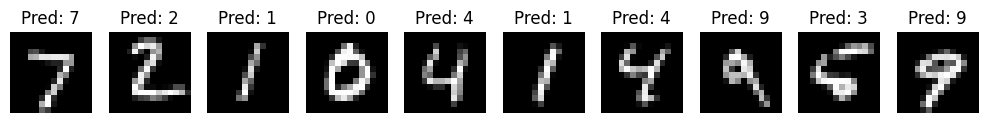

In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np

lol = torch.tensor(x_test, dtype=torch.float)
model.eval()
with torch.no_grad():  
    outputs = model(lol)

probs = torch.nn.functional.softmax(outputs, dim=1)
_, predicted_classes = torch.max(probs, 1)

num_samples = 10
print("\nDisplaying Predictions and True Labels (First 30 samples):\n")
for i, (true_label, pred_label) in enumerate(zip(y_test, predicted_classes)):
    if i >= num_samples:
        break


    print(f"Sample {i+1}:")
    print(f"  True Label: {true_label}    Predicted Label: {pred_label.item()}")
    print(f"  Prediction Probability: {probs[i, pred_label].item():.4f}")


    if true_label != pred_label:
        print("  ** Incorrect Prediction **")

    print("-" * 50)

plt.figure(figsize=(10, 10)) 
for i in range(min(num_samples, len(lol))): 
    plt.subplot(10, 10, i+1) 
    plt.imshow(lol[i].cpu().numpy().reshape(14, 14), cmap='gray') 
    plt.title(f"Pred: {predicted_classes[i].item()}") 
    plt.axis('off') 

plt.tight_layout() 
plt.show()


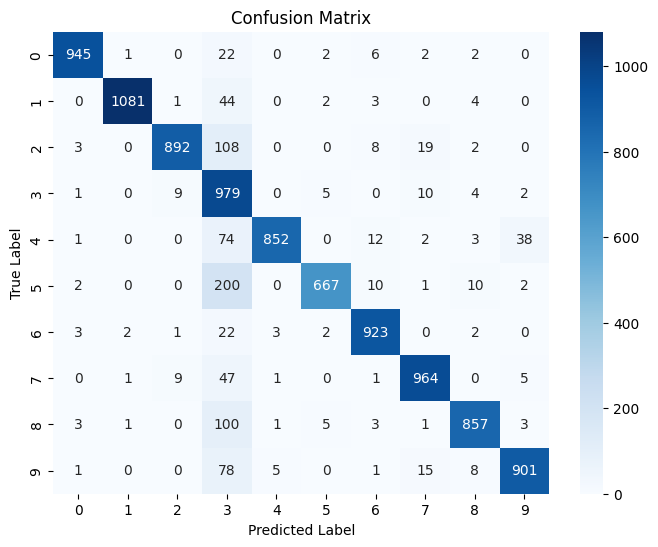

In [48]:
from sklearn.metrics import confusion_matrix
# Generate predictions for the test set
lol = torch.tensor(x_test, dtype=torch.float)
model.eval()
with torch.no_grad():
    outputs = model(lol)
    _, predicted_classes = torch.max(outputs, 1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_classes.cpu().numpy())

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
